In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

low_memory = False

In [48]:
salary = pd.read_csv("Salaries.csv", index_col = "Id")
salary.head()

/home/sabin_adk/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
# returns total rows and columns
salary.shape

(148654, 12)

In [4]:
# getting the overall information of the dataset
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 1 to 148654
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148049 non-null  object 
 3   OvertimePay       148654 non-null  object 
 4   OtherPay          148654 non-null  object 
 5   Benefits          112495 non-null  object 
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
 9   Notes             0 non-null       float64
 10  Agency            148654 non-null  object 
 11  Status            38119 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 14.7+ MB


In [5]:
# getting the datatypes of all the columns 
salary.dtypes

EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [6]:
# getting the names of columns
salary.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [7]:
# getting index data
salary.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            148645, 148646, 148647, 148648, 148649, 148650, 148651, 148652,
            148653, 148654],
           dtype='int64', name='Id', length=148654)

In [8]:
#removing column which contains null values only
salary.drop("Notes", axis = 1, inplace = True)

In [9]:
# taking only valid employee names
salary = salary[salary.EmployeeName != 'Not provided']

In [10]:
salary.Status.unique()

array([nan, 'PT', 'FT'], dtype=object)

In [11]:
# replacing nan values with other values
salary.loc[:,'Status'] = salary["Status"].replace(np.nan, "Not provided")

In [12]:
# converting the data type of the columns to float
salary.loc[:,["BasePay", 'OvertimePay', "OtherPay"]] = salary[["BasePay", "OvertimePay", "OtherPay"]].astype(float)

In [13]:
salary.loc[:,"Benefits"] = salary.loc[:,"Benefits"].astype(float)

In [14]:
# getting the random sample
salary.sample(10)


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
Id,,,,,,,,,,,
102306,Marcelino P Bustos,Construction Inspector,35314.38,0.00,0.00,0.00,35314.38,35314.38,2013,San Francisco,Not provided
135966,Michael N Gordon,Painter,53470.40,0.00,914.25,21969.04,54384.65,76353.69,2014,San Francisco,PT
78701,Patrick J Griffin,Manager II,109853.78,0.00,20835.96,39813.01,130689.74,170502.75,2013,San Francisco,Not provided
143055,Stan Kudearoff,Public Svc Aide-Public Works,10979.76,0.00,956.35,1835.13,11936.11,13771.24,2014,San Francisco,PT
119843,Joseph Liu,Assoc Engineer,103836.03,0.00,3306.48,37040.06,107142.51,144182.57,2014,San Francisco,FT
40607,Cesli May Galan,Registered Nurse,120424.65,108.31,9309.59,45298.61,129842.55,175141.16,2012,San Francisco,Not provided
56497,Gina Gutierrez,Legal Secretary 1,64198.33,0.00,556.30,29035.24,64754.63,93789.87,2012,San Francisco,Not provided
92865,Keyshi Anderson,Transit Operator,62952.32,4123.03,482.89,29787.30,67558.24,97345.54,2013,San Francisco,Not provided
120362,Bernard S Kaiwi,Deputy Sheriff,94191.00,2335.33,8526.33,35498.60,105052.66,140551.26,2014,San Francisco,FT


In [15]:
# droping two columns 
salary.drop(labels = ['Agency', 'Status'], axis = 1, inplace = True)
salary.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


In [16]:
#counting the no of zero values in BasaPay
(salary["BasePay"] == 0).value_counts()

False    147352
True       1298
Name: BasePay, dtype: int64

In [17]:
# filtering data containing null values
mask1 = salary['BasePay'] == 0
mask2 = salary["OtherPay"] == 0
mask3 = salary["Benefits"] == 0
mask4 = salary["TotalPay"] == 0
mask5 = salary["OvertimePay"] == 0
mask6 = salary["TotalPayBenefits"] == 0

In [18]:
# removing specific rows containing values = 0.00
indexNames = salary[mask1 & mask2 & mask3 & mask4 & mask5 & mask6].index
salary.drop(indexNames, inplace = True)


In [19]:
salary

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
148623,Jacqueline Hubbard,Senior Clerk,0.00,0.00,13.77,0.00,13.77,13.77,2014
148624,Deborah B Honig,Attorney (Civil/Criminal),0.00,0.00,13.35,0.13,13.35,13.48,2014
148625,Lorraine Rosenthal,Senior Clerk,0.00,0.00,12.89,0.00,12.89,12.89,2014


In [20]:
salary[salary["TotalPay"] == salary["TotalPayBenefits"]].count()

EmployeeName        37870
JobTitle            37870
BasePay             37732
OvertimePay         37870
OtherPay            37870
Benefits             1711
TotalPay            37870
TotalPayBenefits    37870
Year                37870
dtype: int64

In [21]:
# EmmployeeName and JobTitle with top 5 highest salary
salary.loc[salary['TotalPayBenefits'].nlargest(5).index][['EmployeeName', 'JobTitle']]

,EmployeeName,JobTitle
Id,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT)
110532,David Shinn,Deputy Chief 3
110533,Amy P Hart,Asst Med Examiner
110534,William J Coaker Jr.,Chief Investment Officer


In [22]:
# details of Employee with lowest salary
salary.loc[salary['TotalPayBenefits'].idxmin()]

EmployeeName                         Joe Lopez
JobTitle            Counselor, Log Cabin Ranch
BasePay                                      0
OvertimePay                                  0
OtherPay                               -618.13
Benefits                                     0
TotalPay                               -618.13
TotalPayBenefits                       -618.13
Year                                      2014
Name: 148654, dtype: object

In [23]:
salary.loc[salary['TotalPayBenefits'].nlargest(5).index]["JobTitle"].tolist()

['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
 'CAPTAIN III (POLICE DEPARTMENT)',
 'Deputy Chief 3',
 'Asst Med Examiner',
 'Chief Investment Officer']

In [24]:
# all unique jobs 
salary['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ...,
       'Forensic Toxicologist Supervis', 'Conversion', 'Cashier 3'],
      dtype=object)

In [25]:
salary.loc[salary['TotalPayBenefits'].nlargest(5).index][["JobTitle",'Year']]

,JobTitle,Year
Id,,
1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,2011
2,CAPTAIN III (POLICE DEPARTMENT),2011
110532,Deputy Chief 3,2014
110533,Asst Med Examiner,2014
110534,Chief Investment Officer,2014


In [26]:
salary["Year"].unique()

array([2011, 2012, 2013, 2014])

In [27]:
# grouping the dataset acording to the year
years = salary.groupby(by = "Year")

In [28]:
years.describe()

BasePay                                                            \
        count          mean           std     min         25%       50%   
Year                                                                      
2011  36159.0  63595.956517  40556.774993    0.00  33468.1250  62871.72   
2012  36766.0  65436.406857  41782.209797 -166.01  34036.5800  64017.37   
2013  37001.0  69630.030216  44237.113207   15.83  37021.5000  67669.00   
2014  38096.0  66604.609390  44036.699106    0.00  30317.7775  65055.00   

                            OvertimePay               ...    TotalPay  \
             75%        max       count         mean  ...         75%   
Year                                                  ...               
2011  90649.7650  294580.02     36159.0  4531.065429  ...  102512.680   
2012  92427.9275  302578.00     36766.0  5023.417824  ...  104099.170   
2013  98272.5500  319275.01     37606.0  5281.641980  ...  109637.670   
2014  94792.0950  318835.49     38096.0  5405.255126  ...  108021.705   

                TotalPayBenefits                                       \
            max            count           mean           std     min   
Year                                                                    
2011  567595.43          36159.0   71744.103871  47498.706594    0.00   
2012  362844.66          36766.0  100553.229232  63555.796681    1.91   
2013  347102.32          37606.0  101440.519714  66390.034642  -33.89   
2014  471952.64          38096.0  100321.970301  66208.512649 -618.13   

                                                      
             25%         50%          75%        max  
Year                                                  
2011  36810.7600   68213.240  102512.6800  567595.43  
2012  51743.0925  101751.290  142396.3325  407274.78  
2013  48259.6000  101969.445  142793.6875  425815.28  
2014  44398.9575  101154.495  142770.8500  510732.68  

[4 rows x 48 columns]

In [29]:
# returns total values in each year
years.size()

Year
2011    36159
2012    36766
2013    37606
2014    38096
dtype: int64

In [30]:
# getting the first occurance of each values in ecah group
years.first()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
Year,,,,,,,,
2011,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43
2012,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78
2013,Gregory P Suhr,Chief of Police,319275.01,0.00,20007.06,86533.21,339282.07,425815.28
2014,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68


In [31]:
years["BasePay"].describe()[max]

Year
2011    40556.774993
2012    41782.209797
2013    44237.113207
2014    44036.699106
Name: std, dtype: float64

In [32]:
years.max()["TotalPayBenefits"]

Year
2011    567595.43
2012    407274.78
2013    425815.28
2014    510732.68
Name: TotalPayBenefits, dtype: float64

In [33]:
salary.loc[salary['TotalPayBenefits'].nlargest(5).index]["JobTitle"].tolist()

['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
 'CAPTAIN III (POLICE DEPARTMENT)',
 'Deputy Chief 3',
 'Asst Med Examiner',
 'Chief Investment Officer']

In [34]:
years.agg(['max','mean','std'])['TotalPayBenefits']

,max,mean,std
Year,,,
2011,567595.43,71744.103871,47498.706594
2012,407274.78,100553.229232,63555.796681
2013,425815.28,101440.519714,66390.034642
2014,510732.68,100321.970301,66208.512649


In [37]:
df = pd.DataFrame(columns = salary.columns)
df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year


In [38]:
# iterating through each groups and getting the highest salary for each year
# we have to take 2 valriables to iterate through gorups
# one variable for each group and another for values inside each group
for year, data in years:
    highest_salary = data.nlargest(1, "TotalPayBenefits")
    df = df.append(highest_salary)

In [39]:
df


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012
72926,Gregory P Suhr,Chief of Police,319275.01,0.00,20007.06,86533.21,339282.07,425815.28,2013
110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014


In [40]:
salary['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ...,
       'Forensic Toxicologist Supervis', 'Conversion', 'Cashier 3'],
      dtype=object)

<AxesSubplot:ylabel='TotalPayBenefits'>

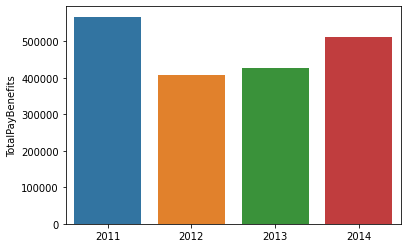

In [41]:
sns.barplot(x = salary.Year.unique(), y = years.max()['TotalPayBenefits'] )

<AxesSubplot:>

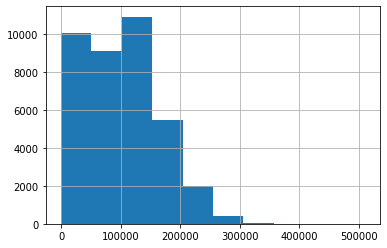

In [42]:
salary[salary['Year'] == 2014]['TotalPayBenefits'].hist()